# **Analyzing Transcripts in Resident Evil: The Actual Work**
## **Step 4: Analyzing the Data**
Once our data has been extracted, cleaned, and saved, we can finally start enriching and analyzing the transcripts. We'll do this using the [`os`](https://docs.python.org/3/library/os.html) module, the [`pandas`](https://pandas.pydata.org/) library, and the [`matplotlib`](https://matplotlib.org/) library.

If you read the `RE_Data_Setup.ipynb` notebook (or looked at the contents of the folder), you'll know that we saved our data into .csv files. For simplicity, we're going to combine all of the data stored in these .csv files into one large dataset, adding new columns called **Game** and **Year** to help us identify data sources. To do this task, we need to map each file to its corresponding game.

### Why didn't you lump everything together from the start?
Even though we're focused on analyzing *Resident Evil* data, we don't always need to compare all thirteen games against each other. Sometimes, we might want to focus on a specific subset of games (i.e. comparing *Resident Evil 2* (1998) to its remake (2019)). Splitting the dataset into multiple files makes it easier for us to manage the individual datasets.

In [1]:
import os
import pandas

# Copied and pasted from RE_Data_Setup.ipynb (Step 1)
def get_path_to_file(file: str) -> str:
    """Returns the path to a file in the working directory.
    Note that there is not error-checking, so the function will return a path
    even if the file doesn't exist within the working directory."""
    return os.path.realpath(file)

# Map each file to the appropriate game
file_list = {'RE0_Transcript.csv': 'Resident Evil 0',
             'RE1_Transcript.csv': 'Resident Evil 1',
             'RE2_Transcript.csv': 'Resident Evil 2',
             'RE2_Remake_Transcript.csv': 'Resident Evil 2 Remake',
             'RE3_Transcript.csv': 'Resident Evil 3',
             'RE3_Remake_Transcript.csv': 'Resident Evil 3 Remake',
             'REV_Transcript.csv': 'Resident Evil Code Veronica',
             'RE4_Transcript.csv': 'Resident Evil 4',
             'RE4_Remake_Transcript.csv': 'Resident Evil 4 Remake',
             'RE5_Transcript.csv': 'Resident Evil 5',
             'RE6_Transcript.csv': 'Resident Evil 6',
             'RE7_Transcript.csv': 'Resident Evil 7',
             'RE8_Transcript.csv': 'Resident Evil Village'
            }

# Map each game to a year
game_years = {'Resident Evil 0': 2002,
              'Resident Evil 1': 1996,
              'Resident Evil 2': 1998,
              'Resident Evil 3': 1999,
              'Resident Evil Code Veronica': 2000,
              'Resident Evil 4': 2005,
              'Resident Evil 5': 2009,
              'Resident Evil 6': 2012,
              'Resident Evil 7': 2017,
              'Resident Evil Village': 2021,
              'Resident Evil 2 Remake': 2019,
              'Resident Evil 3 Remake': 2020,
              'Resident Evil 4 Remake': 2023}

data_set = []
for file, game in file_list.items():
    temp = pandas.read_csv(get_path_to_file(file))
    temp['Game'] = game
    temp['Year'] = game_years[game]
    temp.insert(0, 'Game', temp.pop('Game')) # Shift the columns
    temp.insert(1, 'Year', temp.pop('Year'))
    data_set.append(temp)

re_data = pandas.concat(data_set, ignore_index = True)
re_data

,Game,Year,Character,Gender,Line
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...
1,Resident Evil 0,2002,Man 1,Male,Really?
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?"
3,Resident Evil 0,2002,Man 2,Male,Yeah.
4,Resident Evil 0,2002,Man 3,Male,...do about it?
...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose."
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?"


Here are some questions we can try to answer with our large dataset.

## **Question 1: How many characters exist in *Resident Evil* series?**

In [141]:
# Count the number of unique characters
re_character_counts = re_data.groupby(['Game', 'Year'])['Character'].nunique()
re_character_counts

Game                         Year
Resident Evil 0              2002    19
Resident Evil 1              1996    10
Resident Evil 2              1998    19
Resident Evil 2 Remake       2019    25
Resident Evil 3              1999    26
Resident Evil 3 Remake       2020    19
Resident Evil 4              2005    17
Resident Evil 4 Remake       2023    17
Resident Evil 5              2009    17
Resident Evil 6              2012    23
Resident Evil 7              2017    18
Resident Evil Code Veronica  2000     9
Resident Evil Village        2021    43
Name: Character, dtype: int64

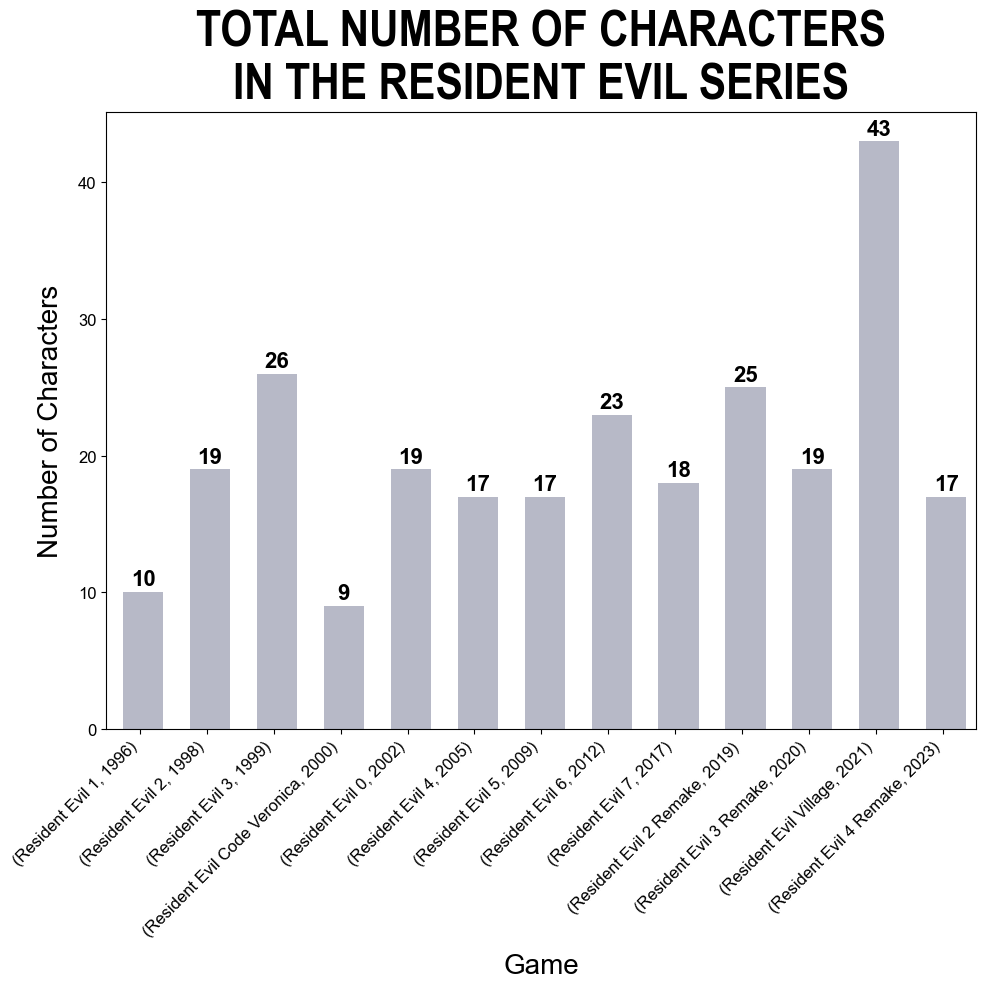

In [142]:
import matplotlib.pyplot as plt

# Add some formatting
title_style = {'fontname': 'Arial', 'fontsize': 36, 'fontstretch': 'condensed', 
               'fontweight': 'bold', 'pad': 10}
label_style = {'fontname': 'Arial', 'fontsize': 20, 'labelpad': 10}
tick_style = {'fontname': 'Arial', 'fontsize': 12}
anno_style = {'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold'}
key_style = {'family': 'Arial', 'size': 16}

# Define the colors
female_color = '#CC0000'
male_color = '#181921'
undefined_color = '#B7B9C7'

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
re_dialogue_counts = re_character_counts.sort_index(level='Year')
ax = re_dialogue_counts.plot(kind = 'bar', color = [undefined_color])

# Annotate the data
for index, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 0.5),
                                          ha = 'center', **anno_style)

ax.set_title('Total Number of Characters\nin the Resident Evil Series'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Characters', **label_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()


## **Question 2: What is the gender composition of those games?**

In [143]:
# Count the number of unique characters (again)
re_unique_characters = re_data.drop_duplicates(subset = ['Game', 'Year', 'Character'])
# Count the number of times a gender appears in the dataset
re_gender_counts = re_unique_characters.groupby(['Game', 'Year'])['Gender'] \
                                                .value_counts(dropna = False)
re_gender_counts

Game                         Year  Gender
Resident Evil 0              2002  Male      12
                                   NaN        5
                                   Female     2
Resident Evil 1              1996  Male       7
                                   Female     2
                                   NaN        1
Resident Evil 2              1998  NaN        9
                                   Male       6
                                   Female     4
Resident Evil 2 Remake       2019  NaN       12
                                   Male       8
                                   Female     5
Resident Evil 3              1999  NaN       16
                                   Male       9
                                   Female     1
Resident Evil 3 Remake       2020  Male      11
                                   NaN        7
                                   Female     1
Resident Evil 4              2005  Male       8
                                   NaN        

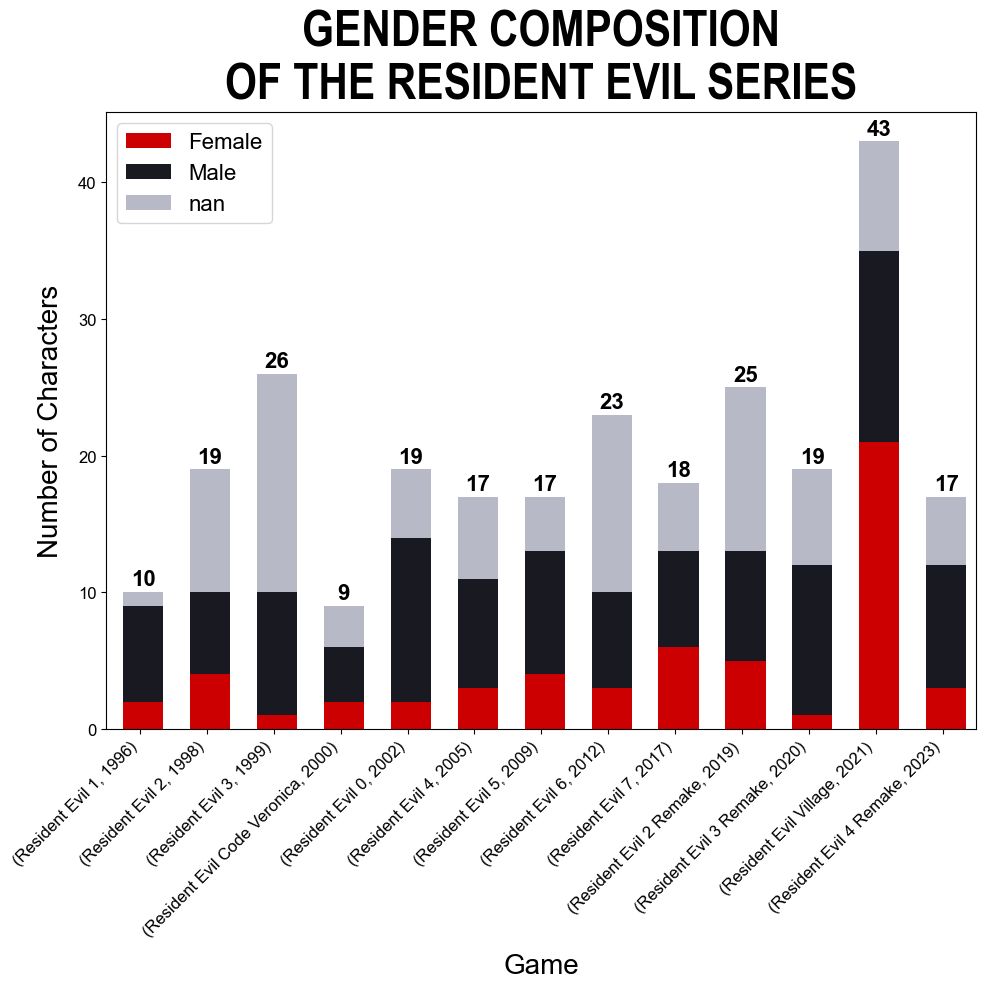

In [144]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = [female_color, male_color, undefined_color], 
                         linewidth = 1, ax = ax)

hatch_columns = list(range(2, len(gender_counts_pivot.columns), 3))
# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(gender_counts_pivot.columns) == 0):
        total_height = int(sum(p.get_height() for p in ax.patches 
                               if p.get_x() == patch.get_x()))
        ax.annotate(f'{total_height}', 
                      (patch.get_x() + patch.get_width() / 2,
                      total_height + 0.5), 
                      ha = 'center',
                      **anno_style)
    
ax.set_title('Gender Composition\nof the Resident Evil Series'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Characters', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

In [145]:
# Count the number of times a gender appears in the dataset
re_gender_counts_overall = re_data['Gender'].value_counts(dropna = False)
re_gender_counts_overall

Gender
Male      4878
Female    3090
NaN        597
Name: count, dtype: int64

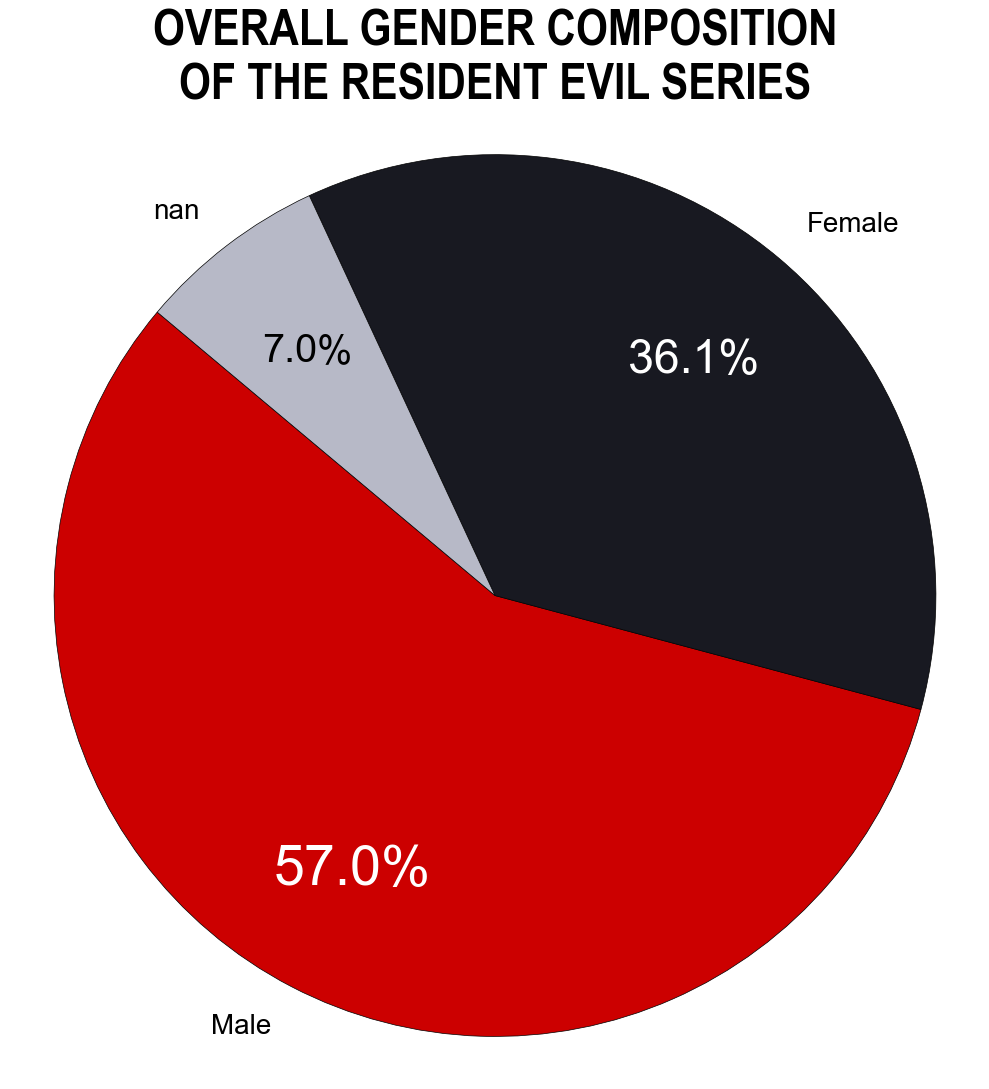

In [286]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

def scale_annotations(autotexts: list) -> None:
    """Scales the annotations."""
    scale = 0.5 # Give the largest slice the largest annotation
    for autotext in autotexts:
        autotext.set_fontsize(label_style['fontsize'] / scale)
        if (scale < 1.0):
            scale += 0.1

# Plot the data
wedges, texts, autotexts = ax.pie(re_gender_counts_overall, 
                                 labels = re_gender_counts_overall.index.
                                          get_level_values('Gender'),
                                 autopct = '%1.1f%%', 
                                 pctdistance = 0.70,
                                 radius = 0.80,
                                 colors = [female_color, 
                                           male_color, 
                                           undefined_color], 
                                 wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                 startangle = 140)
ax.set_title('Overall Gender Composition\n' \
             'of the Resident Evil Series'.upper(),
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)
autotexts[1].set_color('white')
autotexts[0].set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()

## **Question 3: How much do people talk in the Resident Evil games?**

In [153]:
# Count the number of lines
re_dialogue_counts = re_data.groupby(['Game', 'Year'])['Line'].count()
re_dialogue_counts

Game                         Year
Resident Evil 0              2002     233
Resident Evil 1              1996     689
Resident Evil 2              1998     798
Resident Evil 2 Remake       2019     977
Resident Evil 3              1999     289
Resident Evil 3 Remake       2020     456
Resident Evil 4              2005     487
Resident Evil 4 Remake       2023    1092
Resident Evil 5              2009     694
Resident Evil 6              2012    1279
Resident Evil 7              2017     392
Resident Evil Code Veronica  2000     366
Resident Evil Village        2021     813
Name: Line, dtype: int64

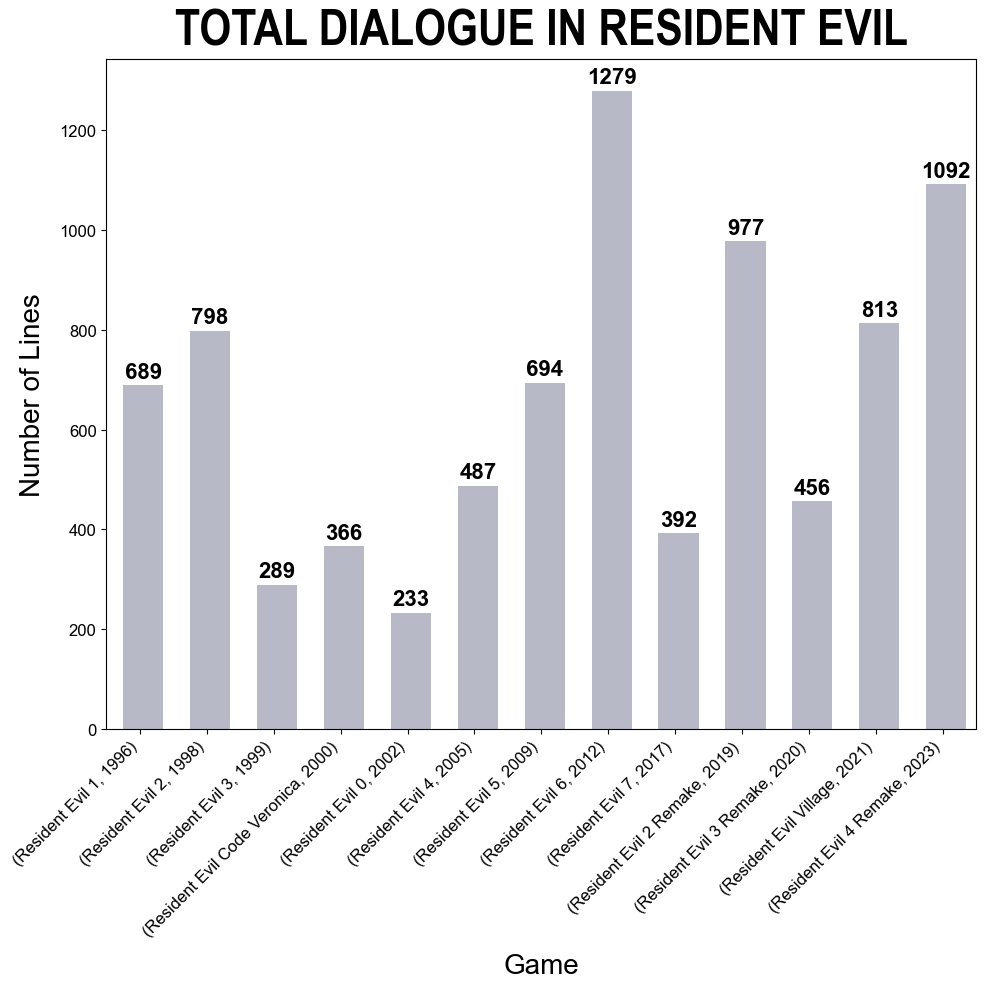

In [155]:
import matplotlib.pyplot as plt

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
re_dialogue_counts = re_dialogue_counts.sort_index(level='Year')
ax = re_dialogue_counts.plot(kind = 'bar', color = [undefined_color])
# Annotate the data
for patch in ax.patches:
    patch.set_width(0.60)
    ax.annotate(f'{patch.get_height()}', 
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 15), 
                   ha = 'center', 
                   **anno_style)
ax.set_title('Total Dialogue in Resident Evil'.upper(), **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

## **Question 4: How often do female characters speak compared to male characters?**

In [156]:
# Group lines by gender and count the number of lines assigned to each gender
re_gender_counts = re_data.groupby(['Game', 'Year'])['Gender']. \
                                   value_counts(dropna = False)
re_gender_counts

Game                         Year  Gender
Resident Evil 0              2002  Male      125
                                   Female     93
                                   NaN        15
Resident Evil 1              1996  Male      391
                                   Female    292
                                   NaN         6
Resident Evil 2              1998  Female    431
                                   Male      306
                                   NaN        61
Resident Evil 2 Remake       2019  Female    505
                                   Male      378
                                   NaN        94
Resident Evil 3              1999  Male      150
                                   Female    114
                                   NaN        25
Resident Evil 3 Remake       2020  Male      245
                                   Female    188
                                   NaN        23
Resident Evil 4              2005  Male      356
                           

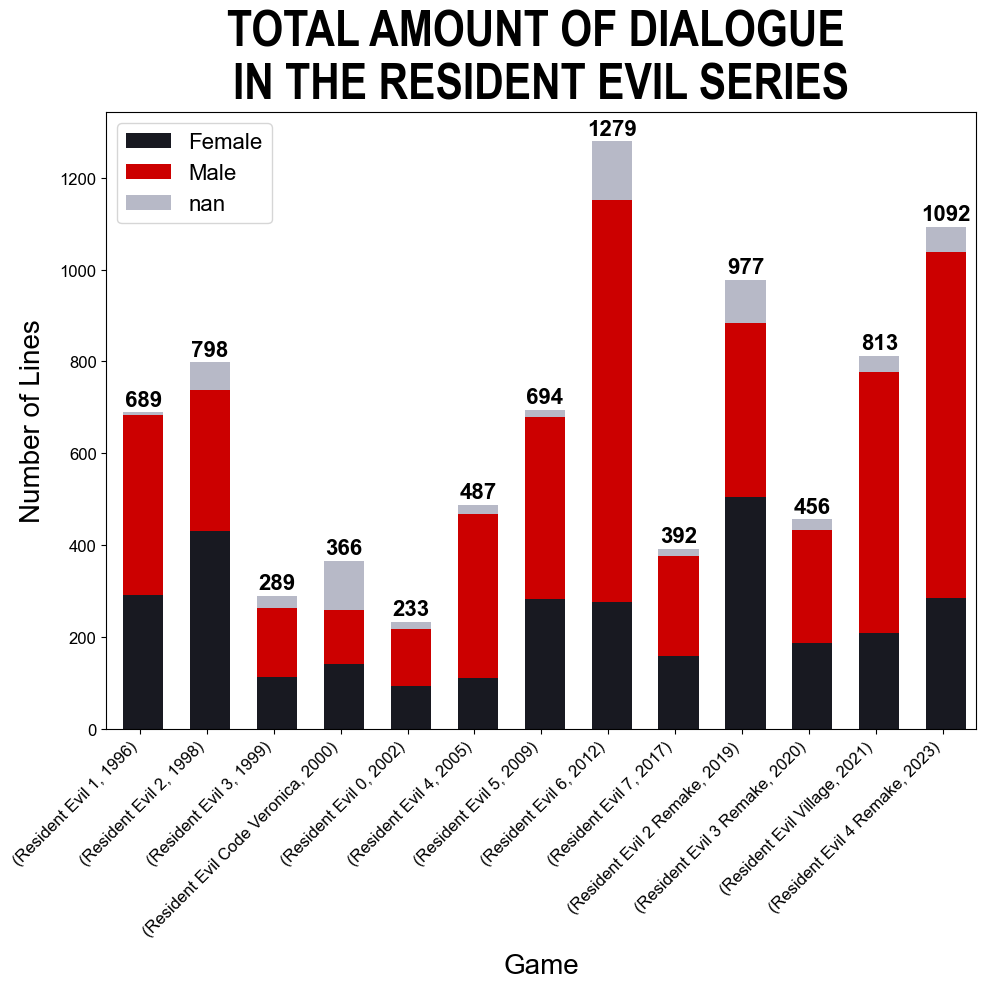

In [160]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Total Dialogue in Resident Evil (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Number of Lines')

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = [male_color, female_color, undefined_color], 
                         edgecolor = 'white', linewidth = 0, ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(gender_counts_pivot.columns) == 0):
        total_height = int(sum(p.get_height() for p in ax.patches 
                               if p.get_x() == patch.get_x()))
        ax.annotate(f'{total_height}', 
                      (patch.get_x() + patch.get_width() / 2,
                       total_height + 15),
                       ha = 'center',
                       **anno_style)
ax.set_title('Total Amount of Dialogue \nin the Resident Evil Series'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

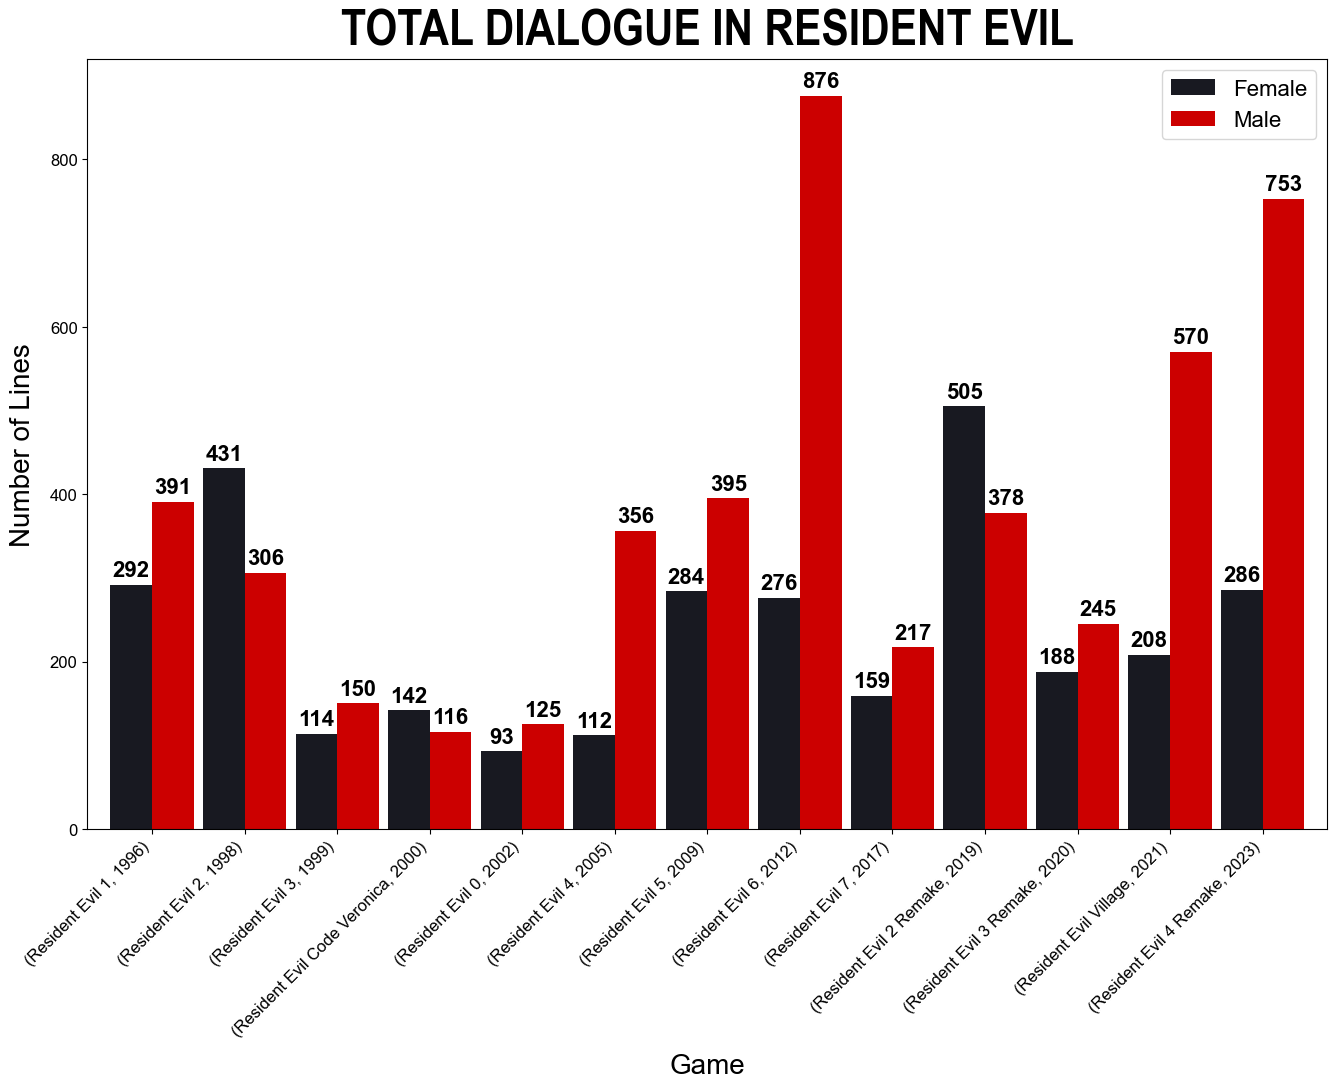

In [161]:
# An alternate way of viewing the data
re_gender_counts = re_data.groupby(['Game', 'Year'])['Gender'].value_counts()
re_gender_counts

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', 
                         stacked = False, 
                         color = [male_color, female_color],
                         ax = ax,
                         width = 0.90)
# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}',
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 10), 
                   ha = 'center',
                   **anno_style)

ax.set_title('Total Dialogue in Resident Evil'.upper(),
              **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.show()

## **Question 5: On average, how long do female characters speak compared to male characters**?
To answer this question, we need to remove emotes and actions (i.e. gasps) from the dialogue. We can achieve this using a regex; the one we used is `\(.*)`, which will capture any characters contained within a set of parentheses (including the parentheses themselves).

In [162]:
import re

def remove_stage_directions(line: str) -> str:
    """Removes stage directions from lines of dialogues.
    Stage directions are phrases contained within parentheses.
    """
    return re.sub("\(.*\)", '', line)

# Copy the data into a new dataframe
re_data_words = re_data
# Remove stage directions from the dataset
re_data_words['Line'] = re_data_words['Line'].apply(remove_stage_directions)
# Count the number of words in each character's dialogue
re_data_words['Words'] = re_data['Line'].apply(lambda x: len(x.split(' ')))
re_data_words

,Game,Year,Character,Gender,Line,Words
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...,100
1,Resident Evil 0,2002,Man 1,Male,Really?,1
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?",6
3,Resident Evil 0,2002,Man 2,Male,Yeah.,1
4,Resident Evil 0,2002,Man 3,Male,...do about it?,3
...,...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.,5
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.,10
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose.",6
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?",7


In [163]:
re_word_counts = round(re_data_words.groupby(
                       ['Game', 'Year', 'Gender'])['Words'].mean(), 2)
re_word_counts

Game                         Year  Gender
Resident Evil 0              2002  Female     6.55
                                   Male       9.62
Resident Evil 1              1996  Female     6.91
                                   Male      10.09
Resident Evil 2              1998  Female     9.16
                                   Male       8.91
Resident Evil 2 Remake       2019  Female     7.07
                                   Male       7.70
Resident Evil 3              1999  Female     7.65
                                   Male      12.39
Resident Evil 3 Remake       2020  Female     6.42
                                   Male      12.38
Resident Evil 4              2005  Female     6.64
                                   Male       9.53
Resident Evil 4 Remake       2023  Female     5.76
                                   Male       7.90
Resident Evil 5              2009  Female     7.81
                                   Male       8.61
Resident Evil 6              2012  Femal

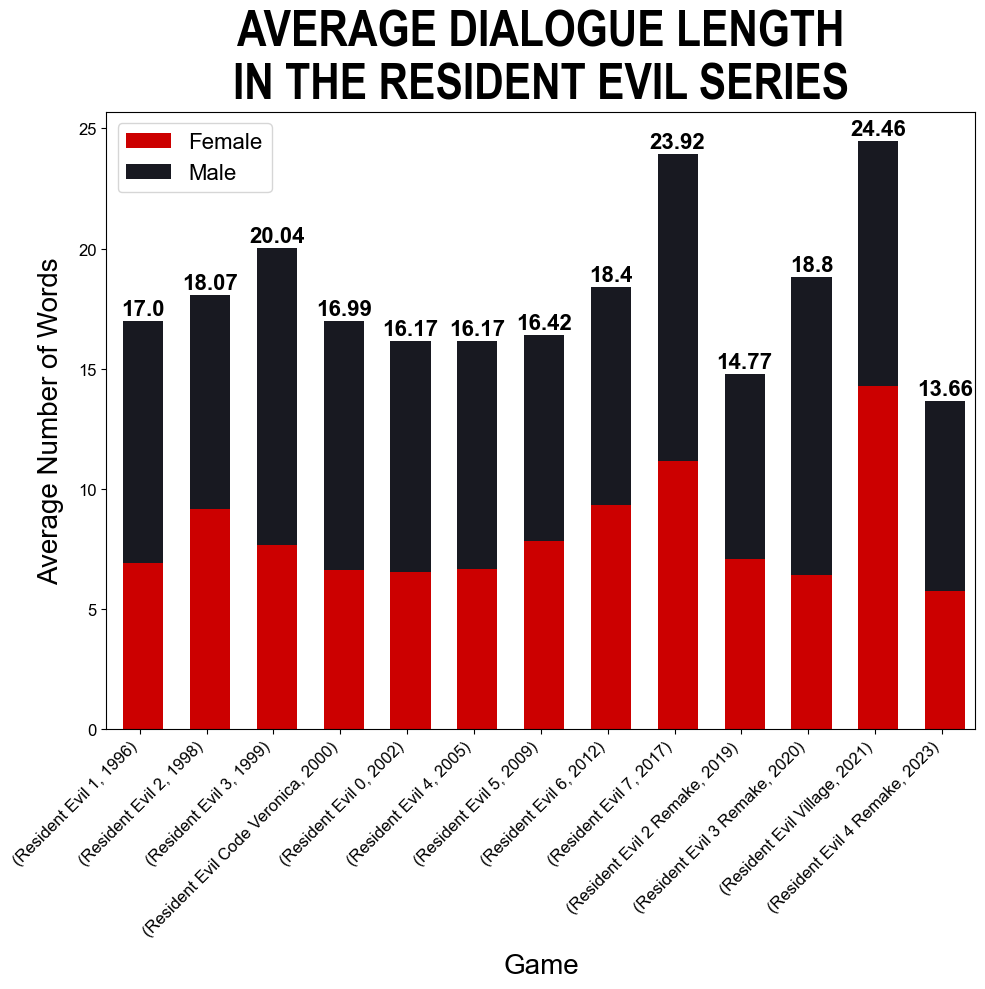

In [166]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = [female_color, male_color], ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(word_counts_pivot.columns) == 0):
        total_height = round(sum(p.get_height() for p in ax.patches 
                             if p.get_x() == patch.get_x()), 2)
        ax.annotate(f'{total_height}', 
                    (patch.get_x() + patch.get_width() / 2,
                     total_height + 0.25),
                     ha = 'center',
                     **anno_style)
ax.set_title('Average Dialogue Length\nin the Resident Evil Series'.upper(),
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Average Number of Words', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

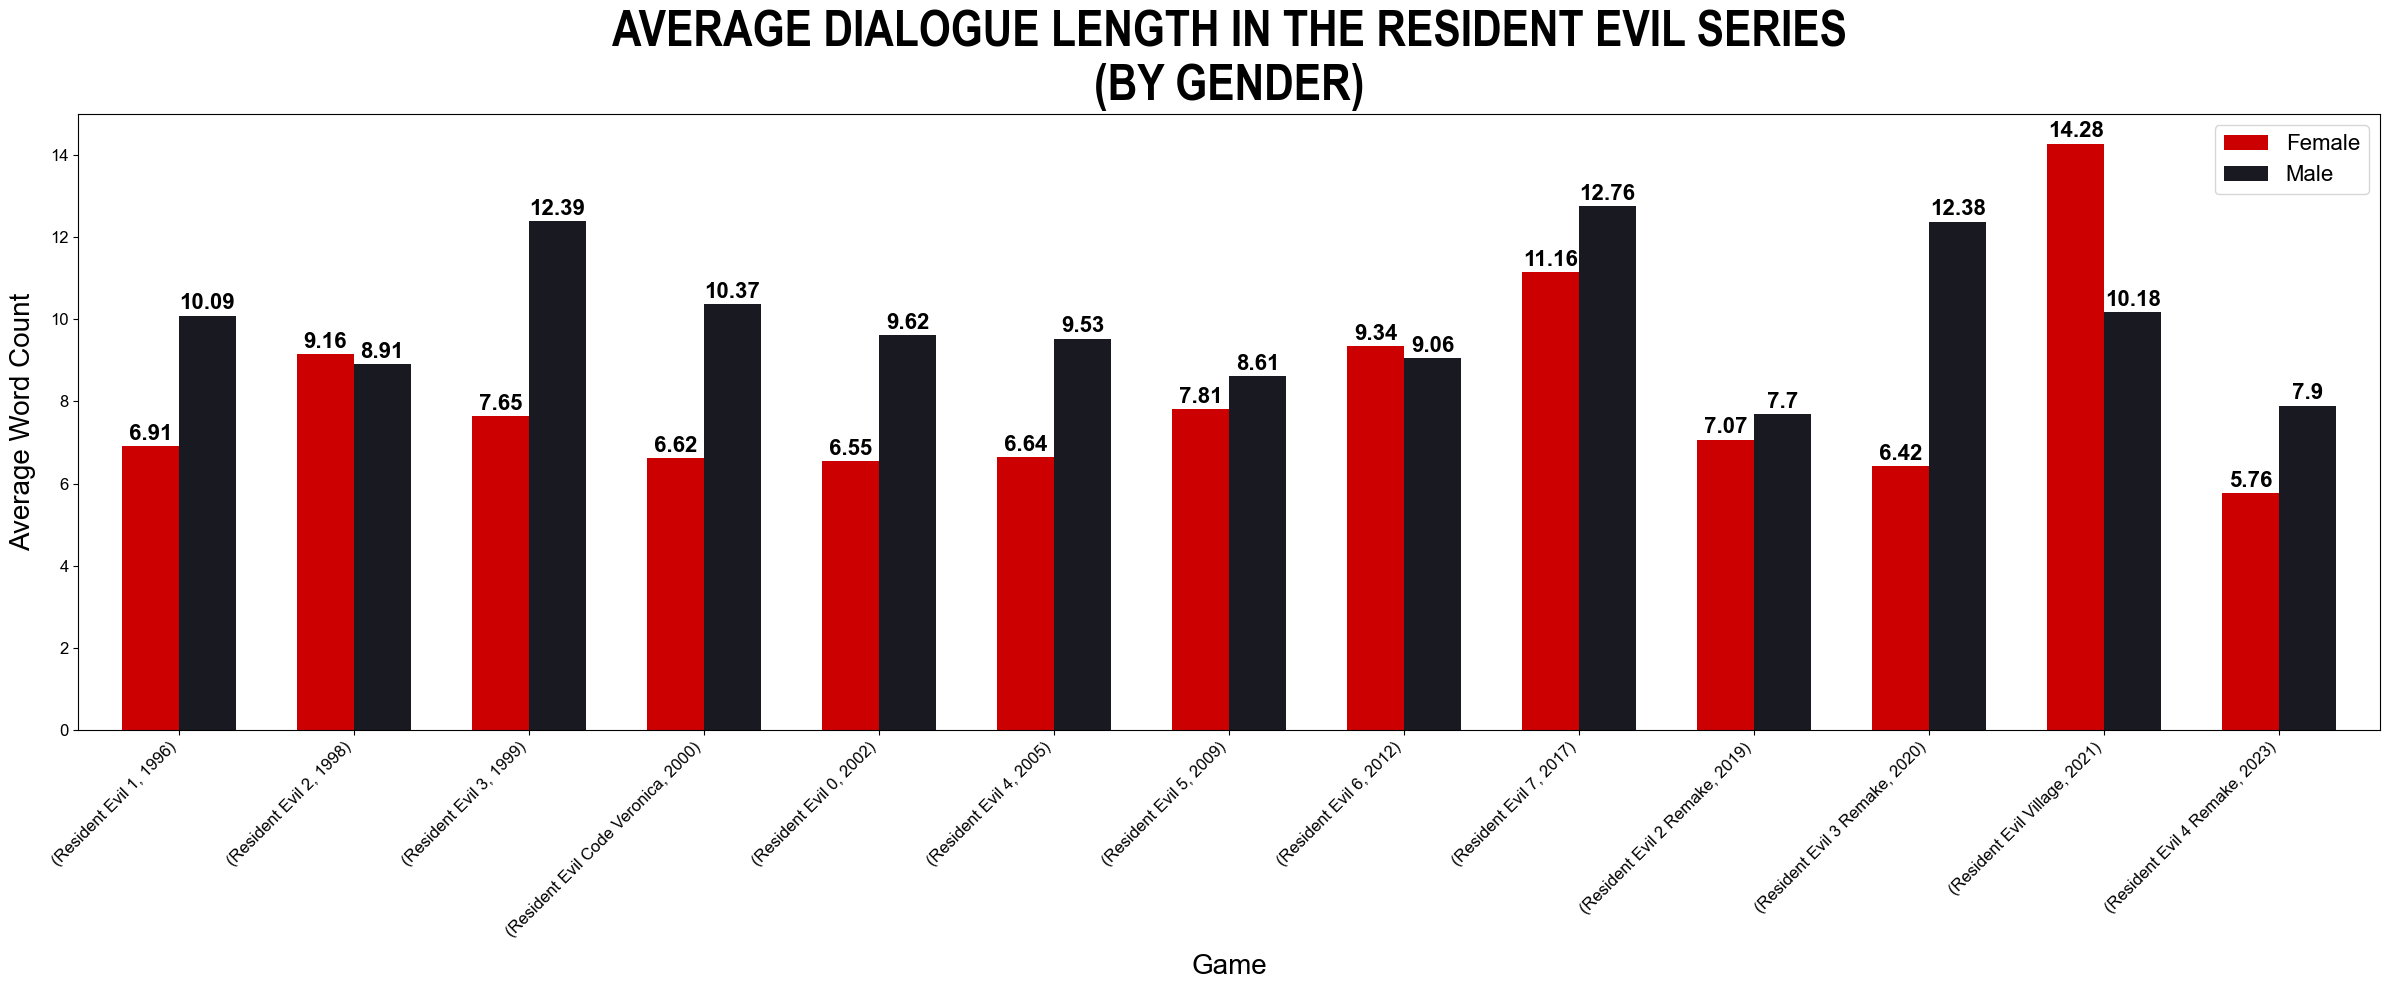

In [169]:
# An alternate way of viewing the data
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(24, 10))

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar',
                       stacked = False, 
                       color = [female_color, male_color],
                       ax = ax,
                       width = 0.65)

# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}',
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 0.15), 
                   ha = 'center',
                   **anno_style)
    
ax.set_title('Average Dialogue Length in the Resident Evil Series\n(by Gender)'.upper(),
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Average Word Count', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

## **Question 6: Who speaks the most overall?**

In [171]:
# Group the characters by name and gender
re_characters = re_data.groupby(['Character', 'Gender'])
# Count the number of times a character speaks
re_character_counts = re_characters['Character'].value_counts()
# Sort the values
re_character_counts = re_character_counts.sort_values(ascending = False)
# Get the Top 10 characters
re_character_counts[:10]

Character  Gender
Leon       Male      1308
Chris      Male       813
Claire     Female     634
Jill       Female     509
Ethan      Male       437
Sherry     Female     390
Ashley     Female     281
Jake       Male       261
Ada        Female     255
Piers      Male       241
Name: count, dtype: int64

In [172]:
from matplotlib import colors

def get_interpolated_color(t: int, start_color: str, end_color: str) -> tuple:
    """Returns a color interpolated between two colors.
    Colors are returned in the RGBA format.
    """
    r0, g0, b0 = colors.hex2color(start_color)
    r1, g1, b1 = colors.hex2color(end_color)
    r = r0 + t * (r1 - r0)
    g = g0 + t * (g1 - g0)
    b = b0 + t * (b1 - b0)
    a = 1
    return (r, g, b, a)

def get_colors(steps: int, start_color: str, end_color: str) -> list:
    """Returns a series of interpolated colors.
    Colors are returned in the RGBA format.
    """
    return [get_interpolated_color((1 / (steps - 1)) * i, start_color, end_color)
            for i in range(steps)]

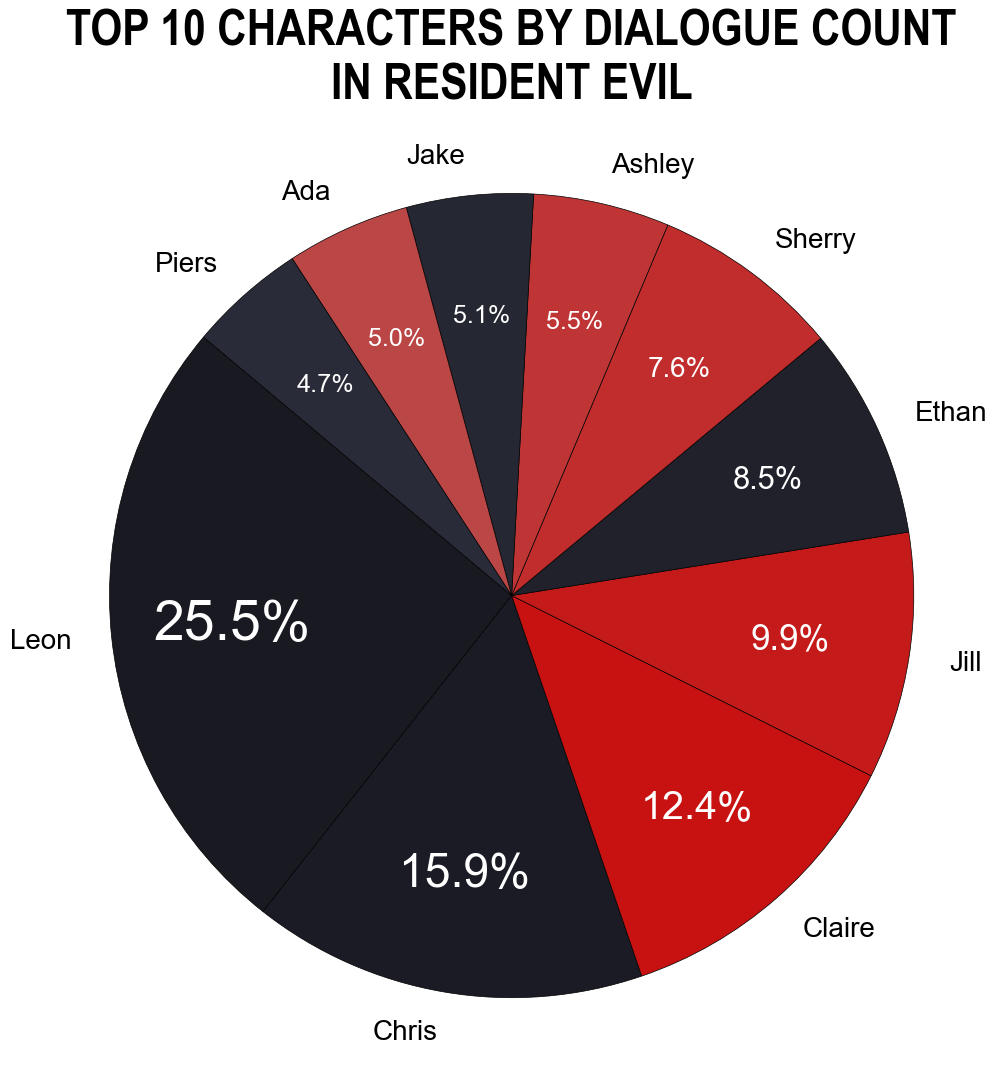

In [287]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

# Define the pie chart colors
male_color_range = get_colors(10, male_color, '#292B38')
female_color_range = get_colors(10, female_color, '#B84F4F')

chart_colors = []
for index, (character, gender) in enumerate(re_character_counts[:10].keys()):
    if (gender.lower() == 'male'):
        chart_colors.append(male_color_range[index])
    elif(gender.lower() == 'female'):
        chart_colors.append(female_color_range[index])

# Plot the data
wedges, texts, autotexts = ax.pie(re_character_counts[:10][:10], 
                                  labels = re_character_counts[:10][:10].index.
                                           get_level_values('Character'),
                                  autopct = '%1.1f%%',
                                  pctdistance = 0.70,
                                  radius = 0.80,
                                  colors = chart_colors, 
                                  wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                  startangle = 140)
ax.set_title('Top 10 Characters by Dialogue Count\n' \
             'in Resident Evil'.upper(),
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)

for autotext in autotexts:
    autotext.set_color('#FFFFFF')

plt.axis('equal')
plt.tight_layout()
plt.show()

The results of the pie chart are not too surprising. Characters who are **major playable characters** in certain games (including the remakes) are likely to have more lines than other characters. **Leon**, for instance, is a protagonist in five different games (*Resident Evil 2*, *Resident Evil 4*, *Resident Evil 6*, the *Resident Evil 2* remake, and the *Resident Evil 4* remake). It is, however, surprising to note that Chris, the character with the greatest number of cameos, has fewer lines than Leon.

## **Question 7: Who is the most mentioned character in Resident Evil?**

In [288]:
# Track all of the characters in the Resident Evil franchise
all_characters = set(re_data['Character'].unique())

# Create a copy (so changes we apply now don't affect the original dataset)
re_copy = re_data.copy()

# Count the number of times another character is mentioned
# in another character's line
def replace_punctuation(line: str) -> str:
    """Replaces all the punctuation within a line of dialogue."""
    return re.sub(r'[^\w\s\'-]', '', line)

def replace_possessives(line: str) -> str:
    """Replaces possessive forms with non-possessive forms"""
    return re.sub(r"(\w+)'s", r"\1s", line)

def get_character_mentions(speaker: str, line: str) -> tuple:
    """Returns all the characters mentioned within a line of dialogue."""
    line = replace_punctuation(line)
    line = replace_possessives(line)
    characters = set(line.split()).intersection(all_characters)
    characters.discard(speaker)
    return characters

re_copy = re_copy.dropna(subset = ['Gender'])
re_copy['Mentions'] = re_copy.apply(lambda x: get_character_mentions(
                                    x['Character'], x['Line']), axis = 1)
mention_counts = re_copy['Mentions'].explode().value_counts(dropna = True)
mention_counts

Mentions
Leon      186
Jill      172
Chris     160
Sherry    135
Claire    100
         ... 
Woman       1
Anton       1
Roxana      1
Canine      1
Tundra      1
Name: count, Length: 86, dtype: int64

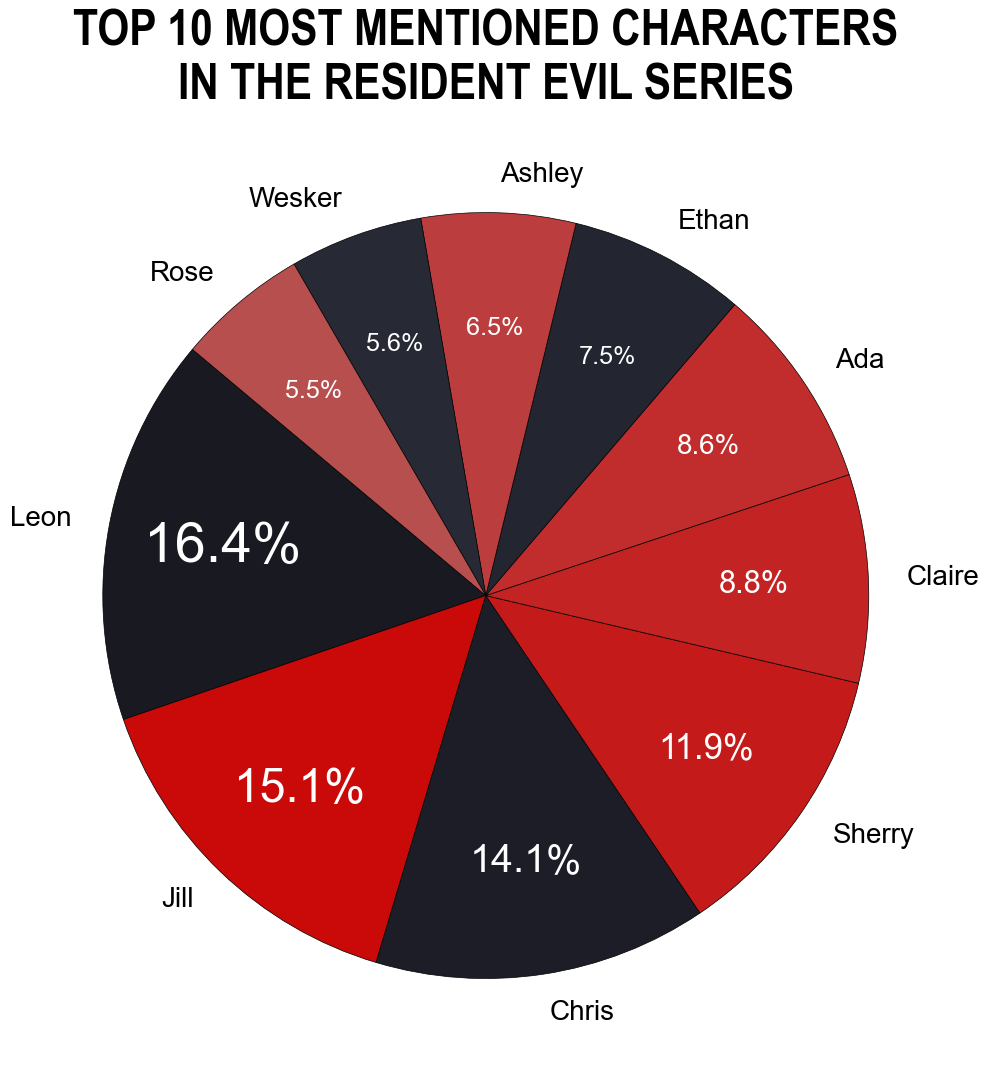

In [289]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

# Define the pie chart colors
male_color_range = get_colors(10, male_color, '#292B38')
female_color_range = get_colors(10, female_color, '#B84F4F')

chart_colors = []
for index, character in enumerate(mention_counts[:10].keys()):
    gender = re_copy.query(f'Character == "{character}"')['Gender'].iloc[0]
    if (gender == 'Male'):
        chart_colors.append(male_color_range[index])
    elif(gender == 'Female'):
        chart_colors.append(female_color_range[index])
        
# Plot the data
wedges, texts, autotexts = ax.pie(mention_counts[:10], 
                                  labels = mention_counts[:10].index,
                                  autopct = '%1.1f%%',
                                  pctdistance = 0.70,
                                  radius = 0.80,
                                  colors = chart_colors, 
                                  wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                  startangle = 140)
ax.set_title('Top 10 Most Mentioned Characters\n' \
             'in the Resident Evil Series'.upper(), **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)

for autotext in autotexts:
    autotext.set_color('#FFFFFF')

plt.axis('equal')
plt.tight_layout()
plt.show()

The results of this pie chart are not too surprising either. All of the characters mentioned in this pie chart are **major characters**; their names will naturally be called or mentioned more often due to story or gameplay needs. This is especially true for characters that are frequently paired with or turned against other characters, such as Ada, Jill, Leon, and Chris.